In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
data  = pd.read_csv('Life Expectancy Data.csv')

In [70]:
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [71]:
#for undrestanding data
num_cols = data.select_dtypes(include= np.number).columns

In [72]:
num_cols

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [73]:
cat_cols= data.select_dtypes(exclude= np.number).columns
cat_cols

Index(['Country', 'Status'], dtype='object')

In [74]:
#Preprocessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [75]:
data.shape


(2938, 22)

In [76]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [77]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [78]:
#to remove space in column name
data = data.rename(columns= lambda x:x.strip())
data.info()
status= data.groupby("Status").size()
status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

Status
Developed      512
Developing    2426
dtype: int64

In [91]:
#import label encoder
#label encoder knowns how to understand the words label
label_encoder= preprocessing.LabelEncoder()
data['Status']=label_encoder.fit_transform(data['Status'])
data

KeyError: 'Status'

In [89]:
data.describe()

Developing   Developing
count  2938.000000  2938.000000
mean      0.825732     0.825732
std       0.379405     0.379405
min       0.000000     0.000000
25%       1.000000     1.000000
50%       1.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000

In [86]:
num_cols= data.select_dtypes(include= np.number).columns

In [87]:
num_cols

Index(['Developing', 'Developing'], dtype='object')

In [88]:
#different method are there to treat na values but we will use replace by means
for i in data.columns.drop('Country'):
    data[i].fillna(data[i].mean(), inplace= True)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null int64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null 

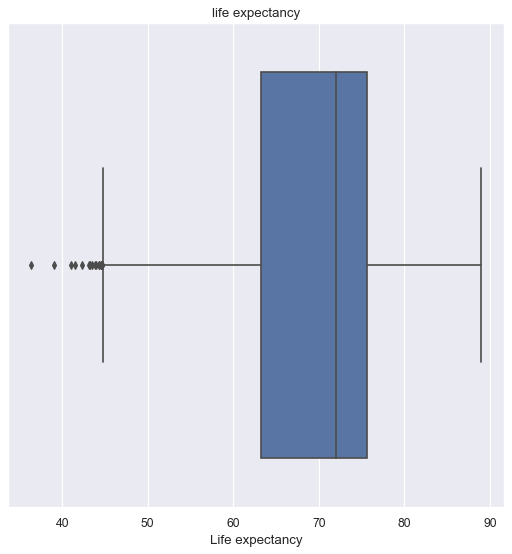

In [23]:
#lets check the distribution of y-variable life expectancy in this case
plt.figure(figsize=(8,8), dpi=80)
sns.boxplot(data['Life expectancy'])
plt.title('life expectancy')
plt.show()

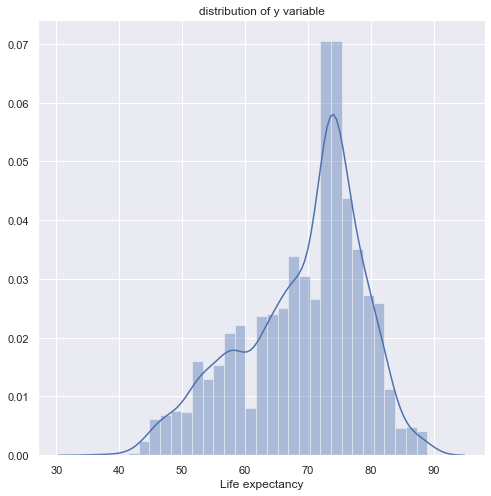

In [24]:
#distribution of y variable 
plt.figure(figsize=(8,8))
plt.title("distribution of y variable")
sns.distplot(data['Life expectancy'])

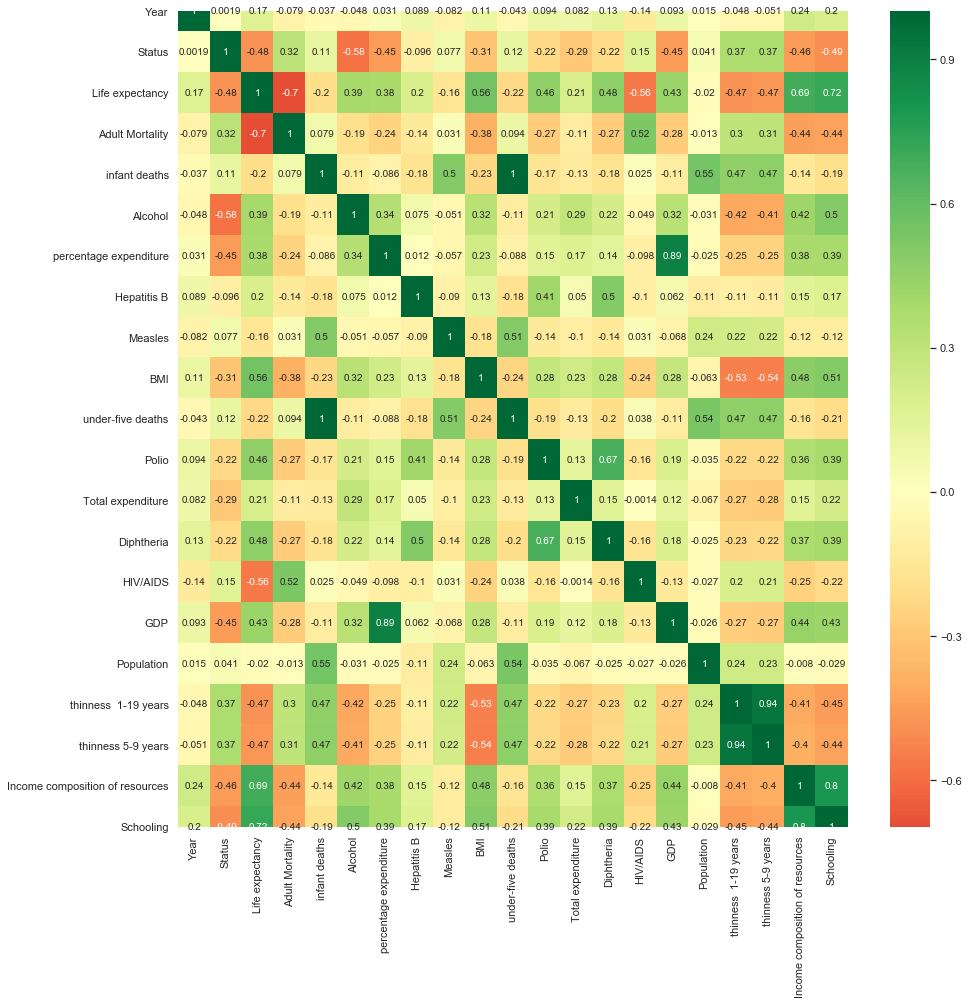

In [25]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data[num_cols].corr(), annot= True, cmap='RdYlGn', center= 0)

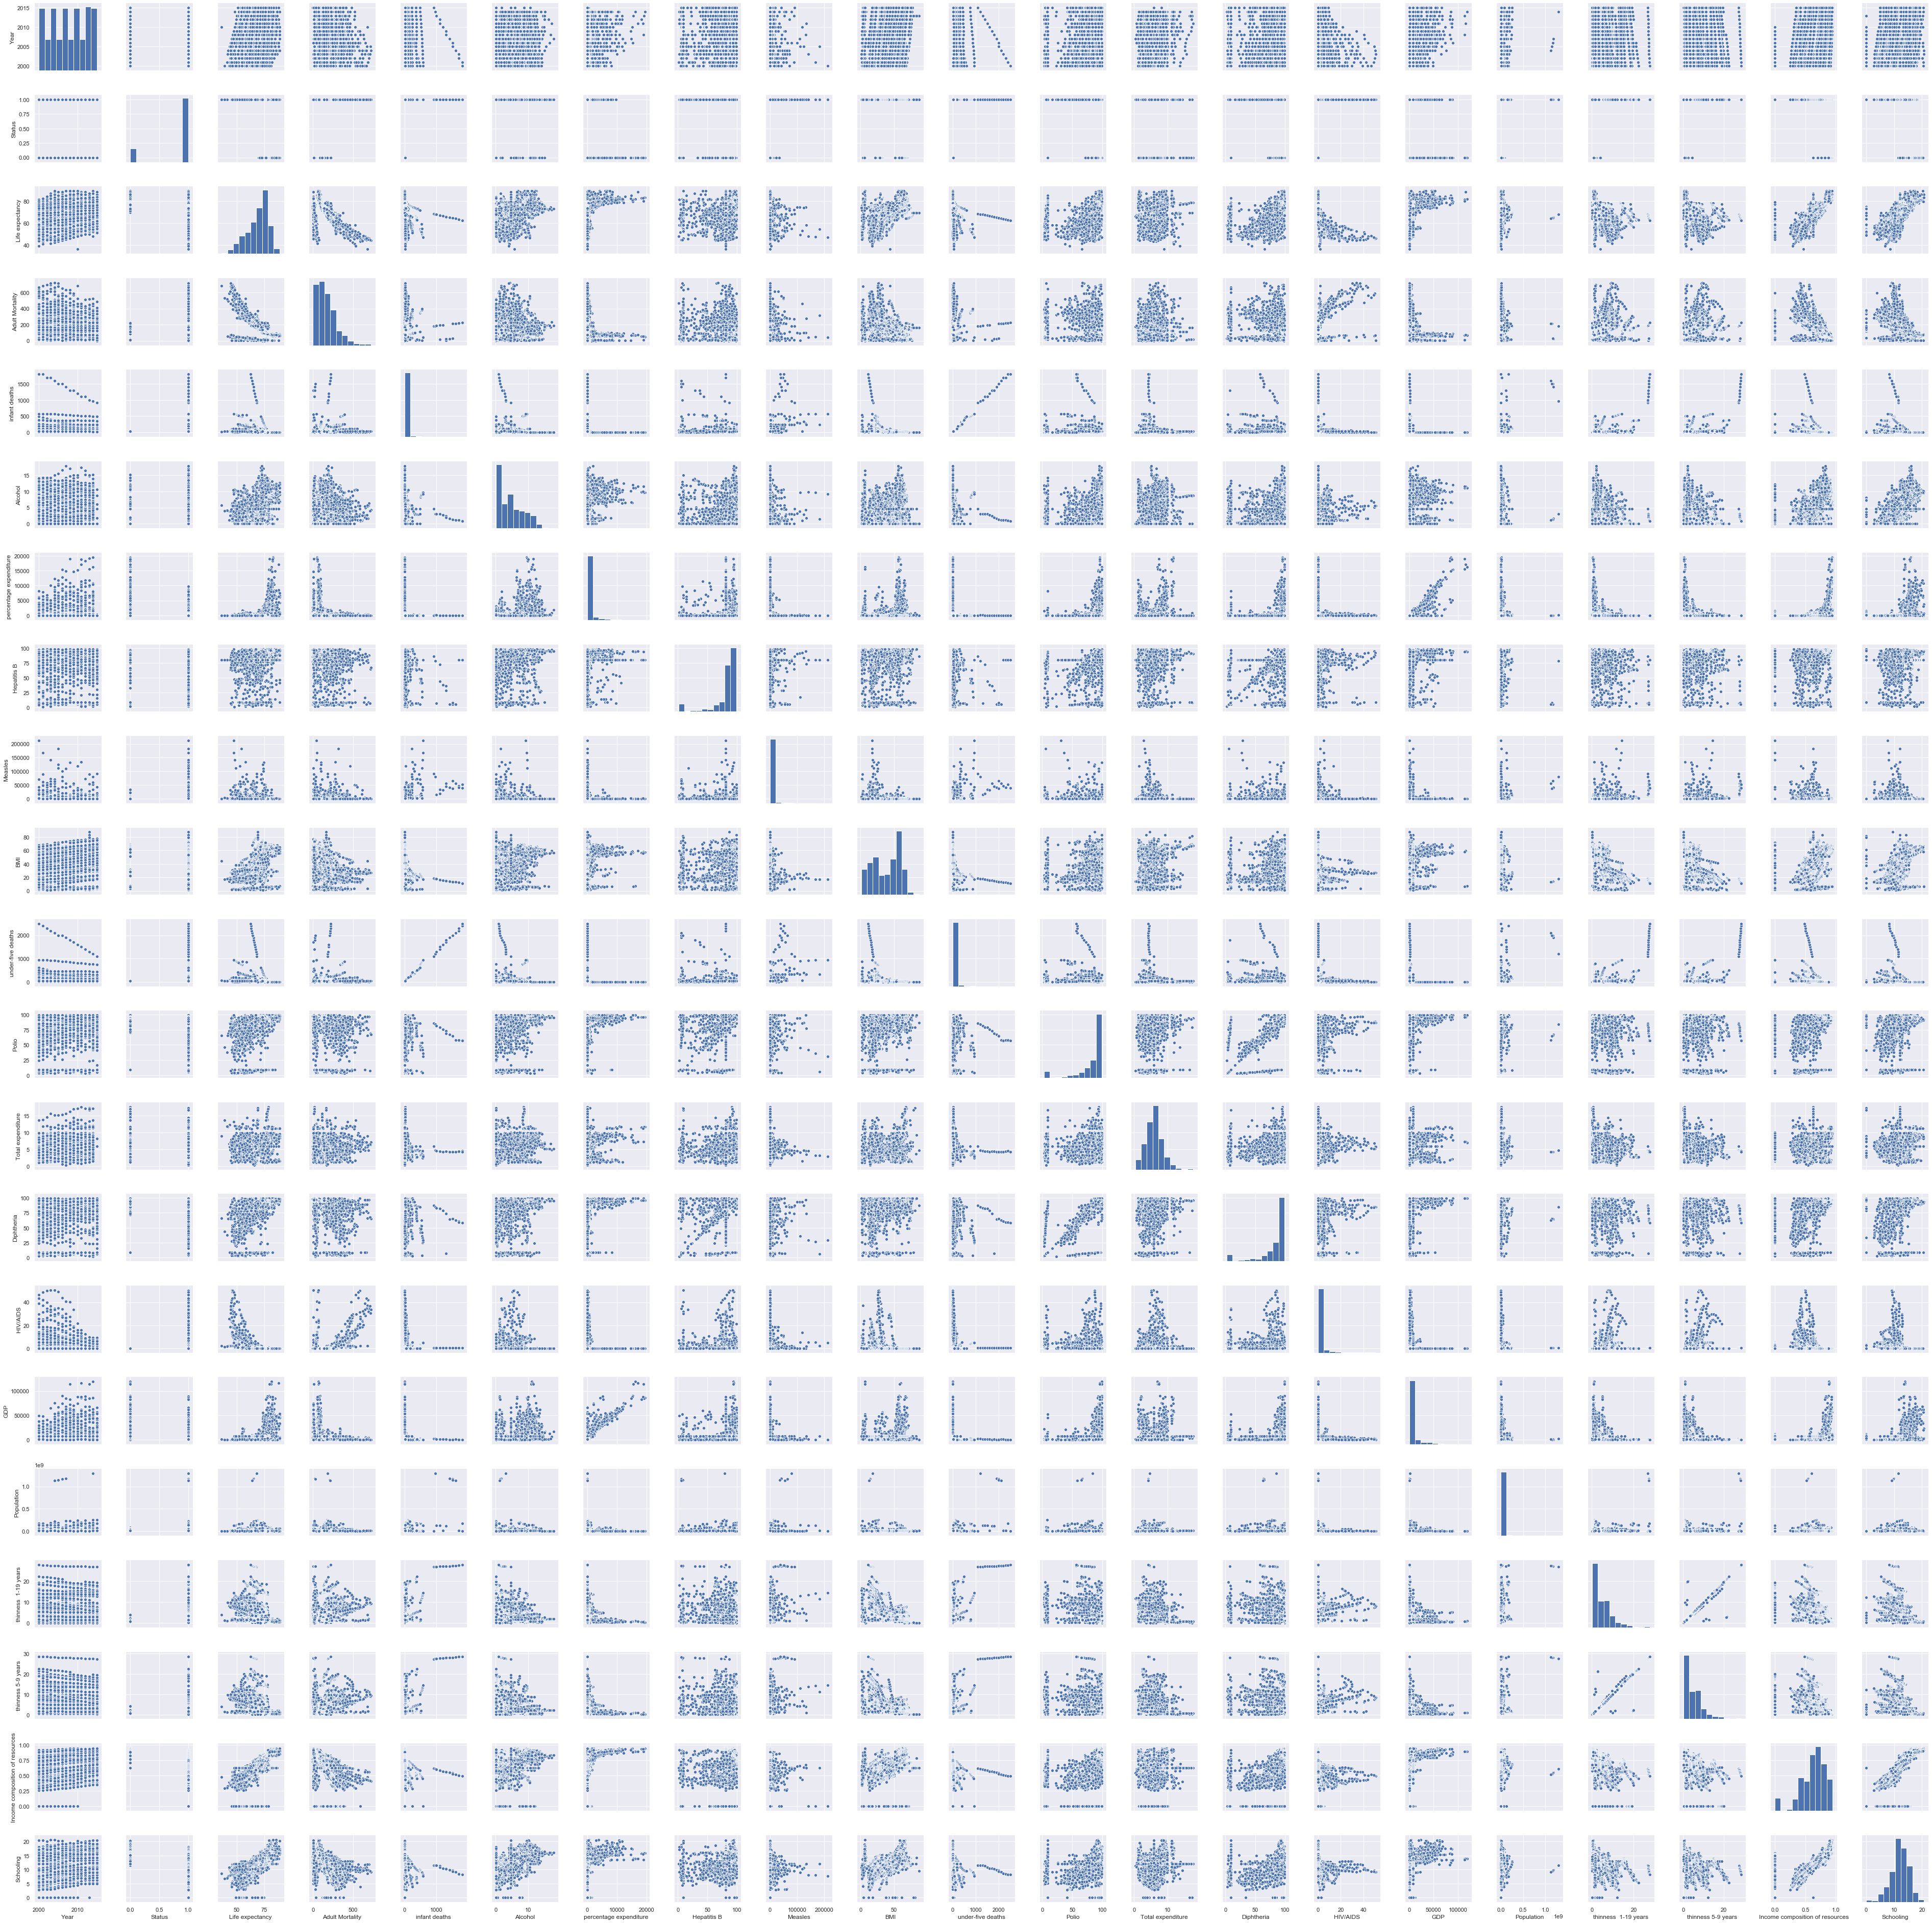

In [38]:
ax= sns.pairplot(data[num_cols])

In [67]:
#building the model 
X= data.drop(columns=['Life expectancy','Country'])
y= data['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

2599    73.1
634     78.0
2705    64.1
1678    71.9
892     56.0
        ... 
2441    74.9
862     58.8
786     76.2
2184    73.2
441     49.4
Name: Life expectancy, Length: 882, dtype: float64

In [48]:
#model with one variable
X_train1 = X_train['Income composition of resources']
#add contants
X_train1 = sm.add_constant(X_train1)
#using first OLS model
model_1 = sm.OLS(y_train, X_train1).fit()


In [49]:
model_1.params

const                              48.440947
Income composition of resources    33.059741
dtype: float64

In [50]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1974.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):          1.09e-302
Time:                        15:31:22   Log-Likelihood:                -6894.3
No. Observations:                2056   AIC:                         1.379e+04
Df Residuals:                    2054   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [51]:
#model with one variable
X_train2 = X_train[['Income composition of resources','Schooling']]
#add contants
X_train2 = sm.add_constant(X_train2)
#using first OLS model
model_2 = sm.OLS(y_train, X_train2).fit()


In [52]:
model_2.params

const                              43.145928
Income composition of resources    16.273079
Schooling                           1.320315
dtype: float64

In [53]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1316.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -6738.3
No. Observations:                2056   AIC:                         1.348e+04
Df Residuals:                    2053   BIC:                         1.350e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [54]:
#model with one variable
X_train3 = X_train[['Income composition of resources','Schooling','Adult Mortality']]
#add contants
X_train3 = sm.add_constant(X_train3)
#using first OLS model
model_3 = sm.OLS(y_train, X_train3).fit()


In [55]:
model_3.params

const                              56.227689
Income composition of resources    10.637516
Schooling                           1.003654
Adult Mortality                    -0.034790
dtype: float64

In [56]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1765.
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        15:31:46   Log-Likelihood:                -6275.3
No. Observations:                2056   AIC:                         1.256e+04
Df Residuals:                    2052   BIC:                         1.258e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

ValueError: shapes (882,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [ ]:
#evaluation of MSE
